# 4. Load Titanic-Dataset

## _. Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('./data_pd/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
len(df)

891

## 4.1. Check nan value in dataset which selected columns

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4.2. Remove missing Data in 'Age' column (177 missing values)

In [7]:
df = df.dropna(subset=['Age'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

## 4.3. Perform data cleaning and data transformation by converting all Age data to numerical type

In [8]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
# Replace invalid age values (e.g., negative ages, equal 0, or float value < 1, more than 120) with NaN
df[df['Age'] < 1] = np.nan
df[df['Age'] > 120] = np.nan

df = df.dropna(subset=['Age'])
df['Age'] = df['Age'].astype(int)
df['Age'].value_counts()

Age
24    31
22    27
28    27
30    27
18    26
      ..
66     1
53     1
80     1
12     1
74     1
Name: count, Length: 70, dtype: int64

In [10]:
# Removing non-numeric characters and convert the column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check values are ourlier
df['Age'].value_counts()

Age
24    31
22    27
28    27
30    27
18    26
      ..
66     1
53     1
80     1
12     1
74     1
Name: count, Length: 70, dtype: int64

In [11]:
# Displaying cleaned Age column statistics to verify the result
print(df['Age'].describe())

count    707.000000
mean      29.973126
std       14.303296
min        1.000000
25%       21.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64


## 4.4. Calculate Mean, Median, Mode, Quartile Ranges, Standard Deviation of Age for "Famale" passengers

In [12]:
df['Sex'].value_counts()

Sex
male      448
female    259
Name: count, dtype: int64

In [13]:
filtered_age_famale = df[df['Sex'] == 'female']
filtered_age_famale.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1.0,0.0,113803,53.1000,C123,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1.0,0.0,237736,30.0708,NaN,C


In [14]:
filtered_age_famale['Age'].describe()

count    259.000000
mean      28.119691
std       13.960810
min        1.000000
25%       18.000000
50%       27.000000
75%       37.500000
max       63.000000
Name: Age, dtype: float64

In [24]:
mean = filtered_age_famale['Age'].mean()
median = filtered_age_famale['Age'].median()
mode = filtered_age_famale['Age'].mode()
std = filtered_age_famale['Age'].std()

In [23]:
n = filtered_age_famale['Age'].count()
ls = filtered_age_famale.sort_values(by='Age', ascending=True)['Age'].to_list()

Q1 = np.percentile(ls, 25)
Q3 = np.percentile(ls, 75)
IQR = Q3 - Q1
print(f"Q1 is: {Q1}\nQ3 is: {Q3}\nIQR is: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in ls if x < lower_bound or x > upper_bound]

print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)
print("Arrays: ", ls)
print("Outliers: ", outliers)

Q1 is: 18.0
Q3 is: 37.5
IQR is: 19.5
lower_bound:  -11.25
upper_bound:  66.75
Arrays:  [1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 8, 8, 9, 9, 9, 9, 10, 11, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 45, 45, 47, 47, 48, 48, 48, 48, 

In [28]:
print("Perform the Age column for 'Famale' passengers:")
print(f'Mean value : {mean}')
print(f'Median value : {median}')
print(f'Mode value : {mode}')
print(f'Quartile Ranges value : {IQR}')
print(f'Standard Deviation value : {std}')

Perform the Age column for 'Famale' passengers:
Mean value : 28.11969111969112
Median value : 27.0
Mode value : 0    24
Name: Age, dtype: int32
Quartile Ranges value : 19.5
Standard Deviation value : 13.96081026158715


## 4.5. Create a box-plot for the same

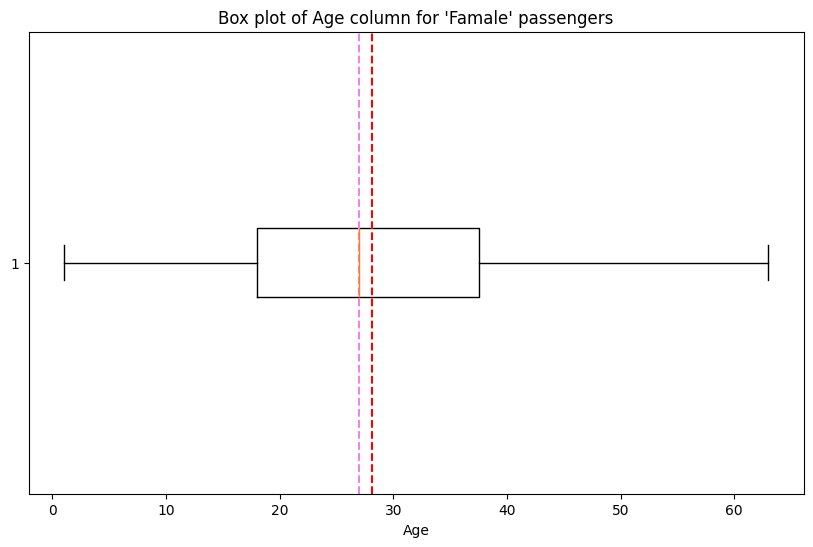

In [39]:
plt.figure(figsize=(10, 6))
plt.boxplot(data=filtered_age_famale['Age'], x=filtered_age_famale['Age'], vert=False)
plt.title("Box plot of Age column for 'Famale' passengers")
plt.axvline(mean, color='red', linestyle='--', label=f"Mean Age = {mean:.2f}")
plt.axvline(median, color='violet', linestyle='--', label=f"Median Age = {median:.2f}")
plt.xlabel('Age')
plt.show()